# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [2]:
data = pd.read_csv("ex1data2.csv")

NameError: name 'pd' is not defined

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [183]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [184]:
X = data.as_matrix(('size', 'nb_bedrooms'))
y = np.array(data.price)
X

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3],
       [1940,    4],
       [2000,    3],
       [1890,    3],
       [4478,    5],
       [1268,    3],
       [2300,    4],
       [1320,    2],
       [1236,    3],
       [2609,    4],
       [3031,    4],
       [1767,    3],
       [1888,    2],
       [1604,    3],
       [1962,    4],
       [3890,    3],
       [1100,    3],
       [1458,    3],
       [2526,    3],
       [2200,    3],
       [2637,    3],
       [1839,    2],
       [1000,    1],
       [2040,    4],
       [3137,    3],
       [1811,    4],
       [1437,    3],
       [1239,    3],
       [2132,    4],
       [4215,    4],
       [2162,    4],
       [1664,    2],
       [2238,    3],
       [2567,    4],
       [1200,    3],
       [ 852,    2],
       [1852,    4],
       [1203,    3]])

### Initialisez theta (combien de dimensions?)

In [185]:
theta = np.zeros(3, dtype=float)

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

In [186]:
X.shape

(47, 2)

In [187]:
theta.shape

(3,)

### Modifiez X en conséquence

In [188]:
X = data.as_matrix(('size', 'nb_bedrooms'))
vector = np.ones(47, dtype=float)
X =np.c_[vector, X]
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

## Écrivez une fonction pour normaliser les features

In [189]:
def featureNormalize(X):
    mean = X.mean(axis=0)
    stdev = X.std(axis=0)
    X = (X - mean)/stdev
    return X, mean, stdev

In [190]:
X[:,1:], mean, stdev = featureNormalize(X[:,1:])
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [207]:
def predict(X, theta):
    return(np.dot(X, theta))
predict(X, theta)
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [266]:
#def cost(X, y, theta):
  #  hypothesis = np.dot(theta[0], X[0]) + np.dot(theta[1], X[1]) + np.dot(theta[2], X[2])
 #   loss = hypothesis - y
  #  cost = np.sum(np.dot(loss, np.transpose(loss)))
   # return(cost / (2*len(np.transpose(X))))
def cost(X, y, theta):
    return ((1/(2 * X.shape[0])) * ((predict(X, theta) - y)**2))
cost(X, y, theta)
X[:,1]

array([ 1.31415422e-01, -5.09640698e-01,  5.07908699e-01, -7.43677059e-01,
        1.27107075e+00, -1.99450507e-02, -5.93588523e-01, -7.29685755e-01,
       -7.89466782e-01, -6.44465993e-01, -7.71822042e-02, -8.65999486e-04,
       -1.40779041e-01,  3.15099326e+00, -9.31923697e-01,  3.80715024e-01,
       -8.65782986e-01, -9.72625673e-01,  7.73743478e-01,  1.31050078e+00,
       -2.97227261e-01, -1.43322915e-01, -5.04552951e-01, -4.91995958e-02,
        2.40309445e+00, -1.14560907e+00, -6.90255715e-01,  6.68172729e-01,
        2.53521350e-01,  8.09357707e-01, -2.05647815e-01, -1.27280274e+00,
        5.00114703e-02,  1.44532608e+00, -2.41262044e-01, -7.16966387e-01,
       -9.68809863e-01,  1.67029651e-01,  2.81647389e+00,  2.05187753e-01,
       -4.28236746e-01,  3.01854946e-01,  7.20322135e-01, -1.01841540e+00,
       -1.46104938e+00, -1.89112638e-01, -1.01459959e+00])

In [281]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = m = X.shape[0]
    print(m)
    J_history = [0] * num_iters
    # Boucler sur le nombre d'itérations
    for i in range(0, num_iters):
        theta0 = theta[0] - alpha * (1/m) * (np.dot(predict(X, theta) - y, X[:,0]))
        theta1 = theta[1] - alpha * (1/m) * (np.dot(predict(X, theta) - y, X[:,1]))
        theta2 = theta[2] - alpha * (1/m) * (np.dot(predict(X, theta) - y, X[:,2]))
        theta = [theta0, theta1, theta2]
        #theta = theta - (alpha/m) * np.dot((predict(X, theta) - y), X)
        J_history[i] = cost(X, y, theta)
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
    #theta = min(cost_history)
    return theta, J_history


## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [282]:
theta, J_history = fit_with_cost(X, y, theta, 0.001, 5000)

47


## Visualisez l'évolution du coût (graphe de convergence)

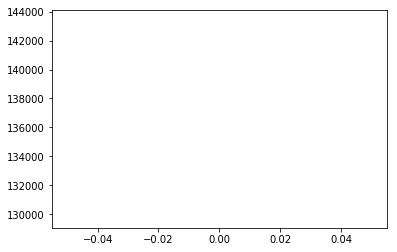

In [283]:
fit = plt.figure()
ax = plt.axes()
ax.plot(np.min(J_history))

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [253]:
X_test = (np.array([1650,3]) - mean)/stdev
X_test = np.hstack([1, X_test])

predict(X_test, [338124.7079769125, 103002.97962878815, -175.43818002248622])

292220.526726964